# Klasyfikacja
## Dzielenie danych na zbiór treningowy i testowy

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

iris = pd.read_csv("iris.csv")
X = iris.drop(columns="variety")
y = iris.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Tworzenie modelu i testowanie

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       0.95      1.00      0.97        19
   Virginica       1.00      0.93      0.96        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Zadania
1. Przypisz następujące przykłady do klasy A lub B przy użyciu metody k-NN z k=3. 
    - Zbiór treningowy: A(1, 3), A(2, 1), A(2, 3), B(4, 3), B(6, 3).
    - Przykłady do zaklasyfikowania: (1, 5), (5, 1), (2, 6), (3, 4).
2. Użyj zbioru treningowego z `Playgolf.xlsx` do klasyfikacji następujących przykładów klasyfikatorem Naive Bayes. Tam, gdzie to konieczne, stosuj wygładzanie $\frac{x_i+1}{N+d}$:
    - (sunny, cool, high, true).
    - (overcast, mild, normal, false).
3. Klasyfikuj przypadki ze zbioru `wdbc.data` jako `M` - *malignant* lub `B` - *benign*.
    - Podziel dane na zbiór treningowy i testowy. Ze zbioru treningowego wydziel dodatkowo zbiór walidacyjny.
    - Użyj k-NN do klasyfikacji przykładów ze zbioru walidacyjnego na podstawie pozostałych danych treningowych i wypisz dokładność, precyzję, pełność, F-miarę. Warto wypisać też macierz omyłek ([`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)).
    - Sprawdź, jaki wpływ na dokładność ma skalowanie danych: [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), [`minmax_scale()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html). Pamiętaj, że skalować należy także dane walidacyjne/testowe.
    - Porównaj dokładność k-NN i regresji logistycznej ([`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).
    - Stwórz wykres zależności dokładności od k. Skorzystaj ze zbioru walidacyjnego.
    - Wybierz najlepszy model i podaj jego dokładność dla danych testowych.
4. Klasyfikuj grzyby ze zbioru `agaricus-lepiota.data` jako trujące (`p` - *poisonous*) lub jadalne (`e` - *edible*) za pomocą [`CategoricalNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html).
    - Brakujące wartości zapisane są w zbiorze jako `?` (wczytując dane podaj `na_values='?'`). Usuń wiersze zawierające brakujące wartości (`dropna(axis='rows')`).
    - Dane wejściowe (`X`) koduj jako 0,1,2,... przy użyciu [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).
    - Podziel dane na zbiór treningowy i testowy. Wypisz macierz omyłek oraz dokładność i F-miarę dla zbioru testowego. 
5. (Bonus) Klasyfikuj wiadomości email ze zbioru `spamham.csv` jako `spam` lub `ham`.
    - Sprawdź w dokumentacji [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), jak przekształcić teksty na wektory zawierające liczbę wystąpień słów.
    - Podziel dane na zbiór treningowy i testowy.
    - Użyj [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) aby klasyfikować wiadomości. Wypisz dokładność na zbiorze testowym.

1. Przypisz następujące przykłady do klasy A lub B przy użyciu metody k-NN z k=3. 
    - Zbiór treningowy: A(1, 3), A(2, 1), A(2, 3), B(4, 3), B(6, 3).
    - Przykłady do zaklasyfikowania: (1, 5), (5, 1), (2, 6), (3, 4).

In [4]:
data_train = {'Klasa': ['A', 'A', 'A', 'B', 'B'],
              'Atrybut1': [1, 2, 2, 4, 6],
              'Atrybut2': [3, 1, 3, 3, 3]}

df_train = pd.DataFrame(data_train)
df_train.head()

,Klasa,Atrybut1,Atrybut2
0,A,1,3
1,A,2,1
2,A,2,3
3,B,4,3
4,B,6,3


In [5]:
data_test = {'Atrybut1': [1, 5, 2, 3],
             'Atrybut2': [5, 1, 6, 4]}

df_test = pd.DataFrame(data_test)
df_test.head()

,Atrybut1,Atrybut2
0,1,5
1,5,1
2,2,6
3,3,4


In [6]:
X_train = df_train[['Atrybut1', 'Atrybut2']]
y_train = df_train['Klasa']

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
#y_pred = knn.predict(X_test.values)

#print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=3)

2. Użyj zbioru treningowego z `Playgolf.xlsx` do klasyfikacji następujących przykładów klasyfikatorem Naive Bayes. Tam, gdzie to konieczne, stosuj wygładzanie $\frac{x_i+1}{N+d}$:
    - (sunny, cool, high, true).
    - (overcast, mild, normal, false).

In [11]:
df2 = pd.read_excel("Playgolf.xlsx")
df2.head()

,outlook,temp,humidity,windy,play?
0,rainy,hot,normal,True,no
1,rainy,mild,high,True,no
2,sunny,hot,high,False,no
3,sunny,hot,high,True,no
4,sunny,mild,high,False,no


3. Klasyfikuj przypadki ze zbioru `wdbc.data` jako `M` - *malignant* lub `B` - *benign*.
    - Podziel dane na zbiór treningowy i testowy. Ze zbioru treningowego wydziel dodatkowo zbiór walidacyjny.
    - Użyj k-NN do klasyfikacji przykładów ze zbioru walidacyjnego na podstawie pozostałych danych treningowych i wypisz dokładność, precyzję, pełność, F-miarę. Warto wypisać też macierz omyłek ([`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)).
    - Sprawdź, jaki wpływ na dokładność ma skalowanie danych: [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), [`minmax_scale()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html). Pamiętaj, że skalować należy także dane walidacyjne/testowe.
    - Porównaj dokładność k-NN i regresji logistycznej ([`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).
    - Stwórz wykres zależności dokładności od k. Skorzystaj ze zbioru walidacyjnego.
    - Wybierz najlepszy model i podaj jego dokładność dla danych testowych.

In [12]:
import random

random.seed(10)

In [13]:
df3 = pd.read_csv("wdbc.data")
df3.head()



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
y = df3.diagnosis
X = df3.drop(columns="diagnosis")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)  #0.8*0.2 = 0.16

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val.values) #Naprawia ten bug o którym mówiłem na zajęciach 

print(classification_report(y_val, y_pred))

c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           B       0.91      0.97      0.94        65
           M       0.91      0.77      0.83        26

    accuracy                           0.91        91
   macro avg       0.91      0.87      0.89        91
weighted avg       0.91      0.91      0.91        91



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred))

[[63  2]
 [ 6 20]]


In [17]:
# Ze skalowaniem
y = df3.diagnosis
X = df3.drop(columns="diagnosis")
from sklearn.preprocessing import minmax_scale
X = minmax_scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)  #0.8*0.2 = 0.16

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val) #Naprawia ten bug o którym mówiłem na zajęciach 

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           B       0.90      1.00      0.95        57
           M       1.00      0.82      0.90        34

    accuracy                           0.93        91
   macro avg       0.95      0.91      0.93        91
weighted avg       0.94      0.93      0.93        91



[[57  0]
 [ 6 28]]


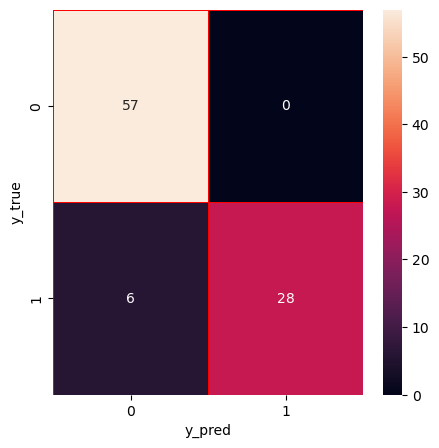

In [18]:
print(confusion_matrix(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)

import seaborn as sns 
import matplotlib.pyplot as plt
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

y = df3.diagnosis
X = df3.drop(columns="diagnosis")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)  #0.8*0.2 = 0.16

Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

y_pred = Logreg.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           B       0.88      0.98      0.93        51
           M       0.97      0.82      0.89        40

    accuracy                           0.91        91
   macro avg       0.92      0.90      0.91        91
weighted avg       0.92      0.91      0.91        91



c:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Ze skalowaniem
y = df3.diagnosis
X = df3.drop(columns="diagnosis")

X = minmax_scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)  #0.8*0.2 = 0.16

Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

y_pred = Logreg.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           B       0.89      1.00      0.94        54
           M       1.00      0.81      0.90        37

    accuracy                           0.92        91
   macro avg       0.94      0.91      0.92        91
weighted avg       0.93      0.92      0.92        91



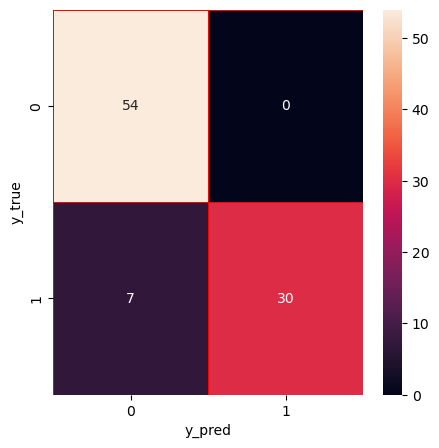

In [23]:
cm = confusion_matrix(y_val, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
from sklearn.metrics import accuracy_score

y = df3.diagnosis
X = df3.drop(columns="diagnosis")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)  #0.8*0.2 = 0.16

accuracy = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_val.values) #Naprawia ten bug o którym mówiłem na zajęciach 
    print("Accuracy for k=", i, " is equal to ", accuracy_score(y_val, y_pred))
    accuracy.append(accuracy_score(y_val, y_pred))
    
print("Najlepsza wartość dokładności jest dla k= ",accuracy.index(max(accuracy)) + 1 , "i wynosi",max(accuracy))
best = accuracy.index(max(accuracy)) + 1




c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy for k= 1  is equal to  0.9230769230769231
Accuracy for k= 2  is equal to  0.9230769230769231


c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy for k= 3  is equal to  0.9340659340659341
Accuracy for k= 4  is equal to  0.9340659340659341


c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy for k= 5  is equal to  0.9340659340659341
Accuracy for k= 6  is equal to  0.945054945054945


c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy for k= 7  is equal to  0.9340659340659341
Accuracy for k= 8  is equal to  0.9340659340659341
Accuracy for k= 9  is equal to  0.9340659340659341
Najlepsza wartość dokładności jest dla k=  6 i wynosi 0.945054945054945


c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Wykres zależności dokładności od hiperparametru k')

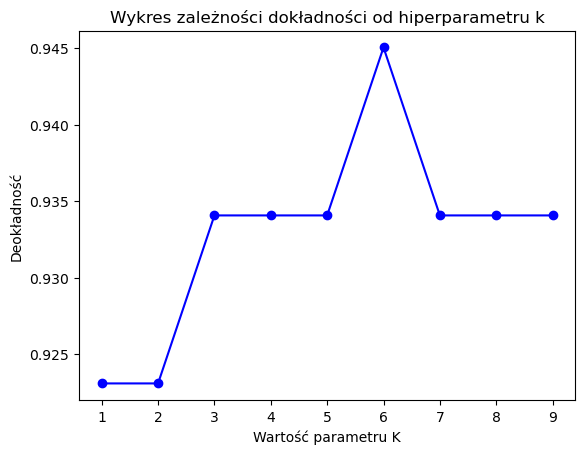

In [49]:
plt.plot(range(1, len(accuracy) + 1), accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('Wartość parametru K')
plt.ylabel('Deokładność')
plt.title('Wykres zależności dokładności od hiperparametru k')


In [50]:
# Best
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, y_train)

#Już nie walidacyjne a testowe
y_pred = knn.predict(X_test.values)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      0.97      0.95        71
           M       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


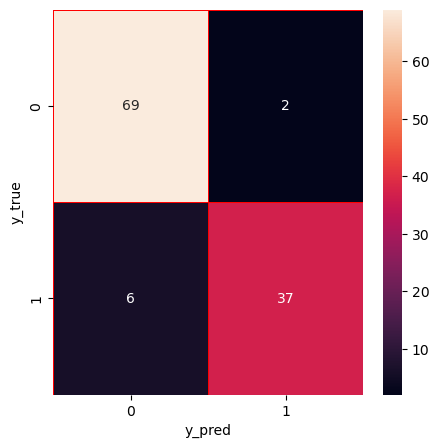

In [51]:
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

4. Klasyfikuj grzyby ze zbioru `agaricus-lepiota.data` jako trujące (`p` - *poisonous*) lub jadalne (`e` - *edible*) za pomocą [`CategoricalNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html).
    - Brakujące wartości zapisane są w zbiorze jako `?` (wczytując dane podaj `na_values='?'`). Usuń wiersze zawierające brakujące wartości (`dropna(axis='rows')`).
    - Dane wejściowe (`X`) koduj jako 0,1,2,... przy użyciu [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).
    - Podziel dane na zbiór treningowy i testowy. Wypisz macierz omyłek oraz dokładność i F-miarę dla zbioru testowego. 

In [20]:
df4 = pd.read_csv("agaricus-lepiota.data", na_values='?')
df4

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [10]:
df4_na = df4.dropna()
df4_na

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,e,b,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8001,e,x,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8038,e,x,y,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
8095,p,x,y,c,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d


In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

# Tworzenie instancji OrdinalEncoder
encoder = OrdinalEncoder()

# Dopasowanie i transformacja danych wejściowych
X_encoded = encoder.fit_transform(df4_na)

# Zamiana z powrotem na DataFrame
df_encoded = pd.DataFrame(X_encoded, columns=df4_na.columns)

df_encoded

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,2.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
1,0.0,5.0,2.0,7.0,1.0,0.0,1.0,0.0,0.0,2.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0
2,0.0,0.0,2.0,6.0,1.0,3.0,1.0,0.0,0.0,3.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,3.0
3,0.0,5.0,3.0,6.0,1.0,6.0,1.0,0.0,1.0,3.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,2.0,...,2.0,5.0,5.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.0,0.0,3.0,4.0,0.0,5.0,1.0,0.0,0.0,7.0,...,3.0,3.0,3.0,0.0,0.0,2.0,3.0,5.0,5.0,4.0
5640,0.0,5.0,3.0,4.0,0.0,5.0,1.0,0.0,0.0,7.0,...,3.0,3.0,3.0,0.0,0.0,2.0,3.0,5.0,5.0,4.0
5641,0.0,5.0,3.0,3.0,1.0,5.0,1.0,0.0,0.0,7.0,...,2.0,5.0,5.0,0.0,0.0,2.0,3.0,5.0,5.0,4.0
5642,0.0,5.0,3.0,1.0,0.0,4.0,1.0,0.0,0.0,8.0,...,3.0,1.0,1.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0


In [38]:
y = df_encoded[["class"]]
X = df_encoded.drop(columns="class")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NaiveBayes = CategoricalNB()

NaiveBayes.fit(X_train, y_train)

y_pred = NaiveBayes.predict(X_test.values)

c:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


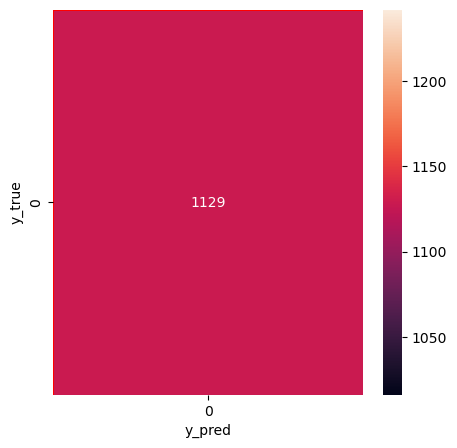

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

5. (Bonus) Klasyfikuj wiadomości email ze zbioru `spamham.csv` jako `spam` lub `ham`.
    - Sprawdź w dokumentacji [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), jak przekształcić teksty na wektory zawierające liczbę wystąpień słów.
    - Podziel dane na zbiór treningowy i testowy.
    - Użyj [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) aby klasyfikować wiadomości. Wypisz dokładność na zbiorze testowym.

In [21]:
df5 = pd.read_csv("spamham.csv")
df5.head()

,is_spam,email_text
0,True,b'From ilug-admin@linux.ie Tue Aug 6 11:51:0...
1,True,b'From 12a1mailbot1@web.de Thu Aug 22 13:17:2...
2,True,b'From ilug-admin@linux.ie Tue Aug 6 11:51:0...
3,True,b'From lmrn@mailexcite.com Mon Jun 24 17:03:2...
4,True,b'From ilug-admin@linux.ie Thu Aug 22 13:27:3...
